Last Updated: 7-28-2017

# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Managing-Projections" data-toc-modified-id="Managing-Projections-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Managing Projections</a></div><div class="lev2 toc-item"><a href="#Coordinate-Reference-Systems" data-toc-modified-id="Coordinate-Reference-Systems-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Coordinate Reference Systems</a></div><div class="lev2 toc-item"><a href="#Setting-a-Projection" data-toc-modified-id="Setting-a-Projection-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Setting a Projection</a></div><div class="lev1 toc-item"><a href="#Reprojecting" data-toc-modified-id="Reprojecting-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Reprojecting</a></div>

# Managing Projections

## Coordinate Reference Systems

- CRS are important because the geometric shapes in a GeoSeries or GeoDataFrame object are simply a collection of coordinates in an arbitrary space.
- A CRS tells python how those coordinates related to places on the Earth.
- geopandas can accept lots of representations of CRS, including the proj4 string itself ("+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs") or parameters broken out in a dictionary: {'proj': 'latlong', 'ellps': 'WGS84', 'datum': 'WGS84', 'no_defs': True}). In addition, some functions will take EPSG codes directly.

For reference, a few very common projections and their proj4 strings:

- WGS84 Latitude/Longitude: ```"+proj=longlat +ellps=WGS84 +datum=WGS84 +no_defs" or "+init=epsg:4326"```
- UTM Zones (North): ```"+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs"```
- UTM Zones (South): ```"+proj=utm +zone=33 +ellps=WGS84 +datum=WGS84 +units=m +no_defs +south"```

## Setting a Projection

There are two relevant operations for projections:
- Setting a projection
- Re-projecting

Setting a projection may be necessary when for some reason geopandas has coordinate data (x-y values), but no information about how those coordinates refer to locations in the real world.

Setting a projection is how one tells geopandas how to interpret coordinates.

If no CRS is set, geopandas geometry operations will still work, but coordinate transformations will not be possible and exported files may not be interpreted correctly by other software.

Example of how to set the projection:

```python
my_geoseries.crs = {'init':'espg:4326'}
```

# Reprojecting

- Reprojecting is the process of changing the representation of locations from one coordinate system to another.

- All projections of locations on the Earth into a two-dimensional plane **are distortions**, the projection that is best for your application may be different from the projection associated with the data you import.

- In these cases, data can be re-projected using the ```to_crs``` command.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.style.use('ggplot')
matplotlib.rcParams['figure.figsize'] = (16, 20)


- Load example data

In [2]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

- Check for original projection

In [3]:
world.crs

{'init': 'epsg:4326'}

- Visualize

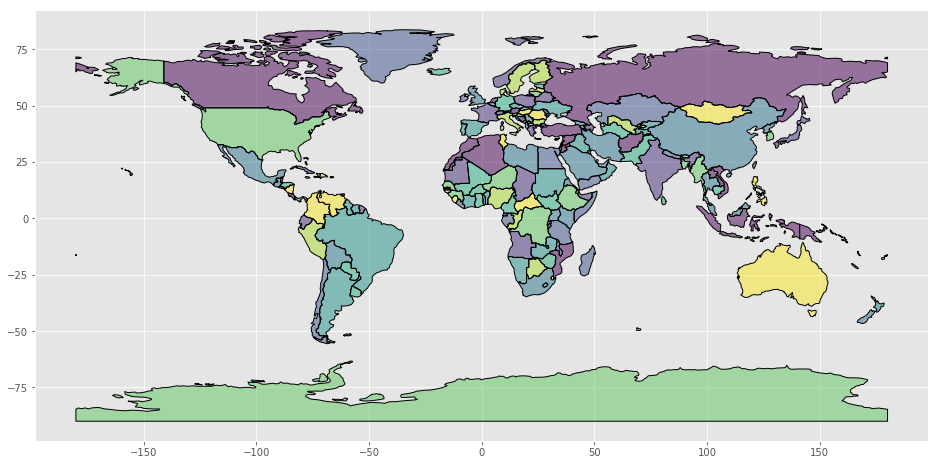

In [4]:
world.plot()
plt.show()

- Reproject to Mercator (after dropping Antarctica)

In [5]:
world = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

In [7]:
world = world.to_crs({'init':'epsg:3395'})

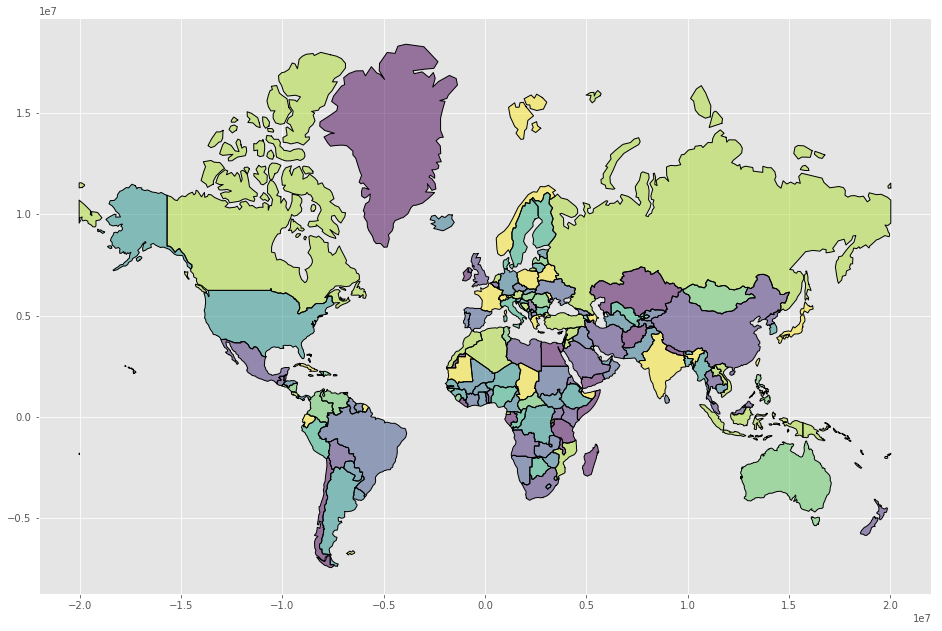

In [10]:
world.plot();